### Importing of Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for building DecisionTree Model
from sklearn.svm import SVC # for building SVM model
from sklearn.neighbors import KNeighborsClassifier # for building KNN model
from sklearn.ensemble import RandomForestClassifier # for building RF model
from sklearn.preprocessing import LabelEncoder # for Label Encoder - to transform string into values
from sklearn.linear_model import LinearRegression # for linear regression model

## Part 1 (IBM HR Attrition Case Study)

### Importing of dataset

In [3]:
df = pd.read_csv("IBM HR Employee Attrition.csv")

df.head() #confirming of data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data understanding

In [8]:
print("Dimension of the data:", df.shape)

print("\n", "--" * 50, "\n")

print("Summary of the data\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum())

print("\n", "--" * 50, "\n")
print("Statistical description:\n")
display(df.describe())


Dimension of the data: (1470, 35)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    

None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince


 ---------------------------------------------------------------------------------------------------- 

Statistical description:



,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### EDA

<b><u> Histogram for all numerical columns</b></u>

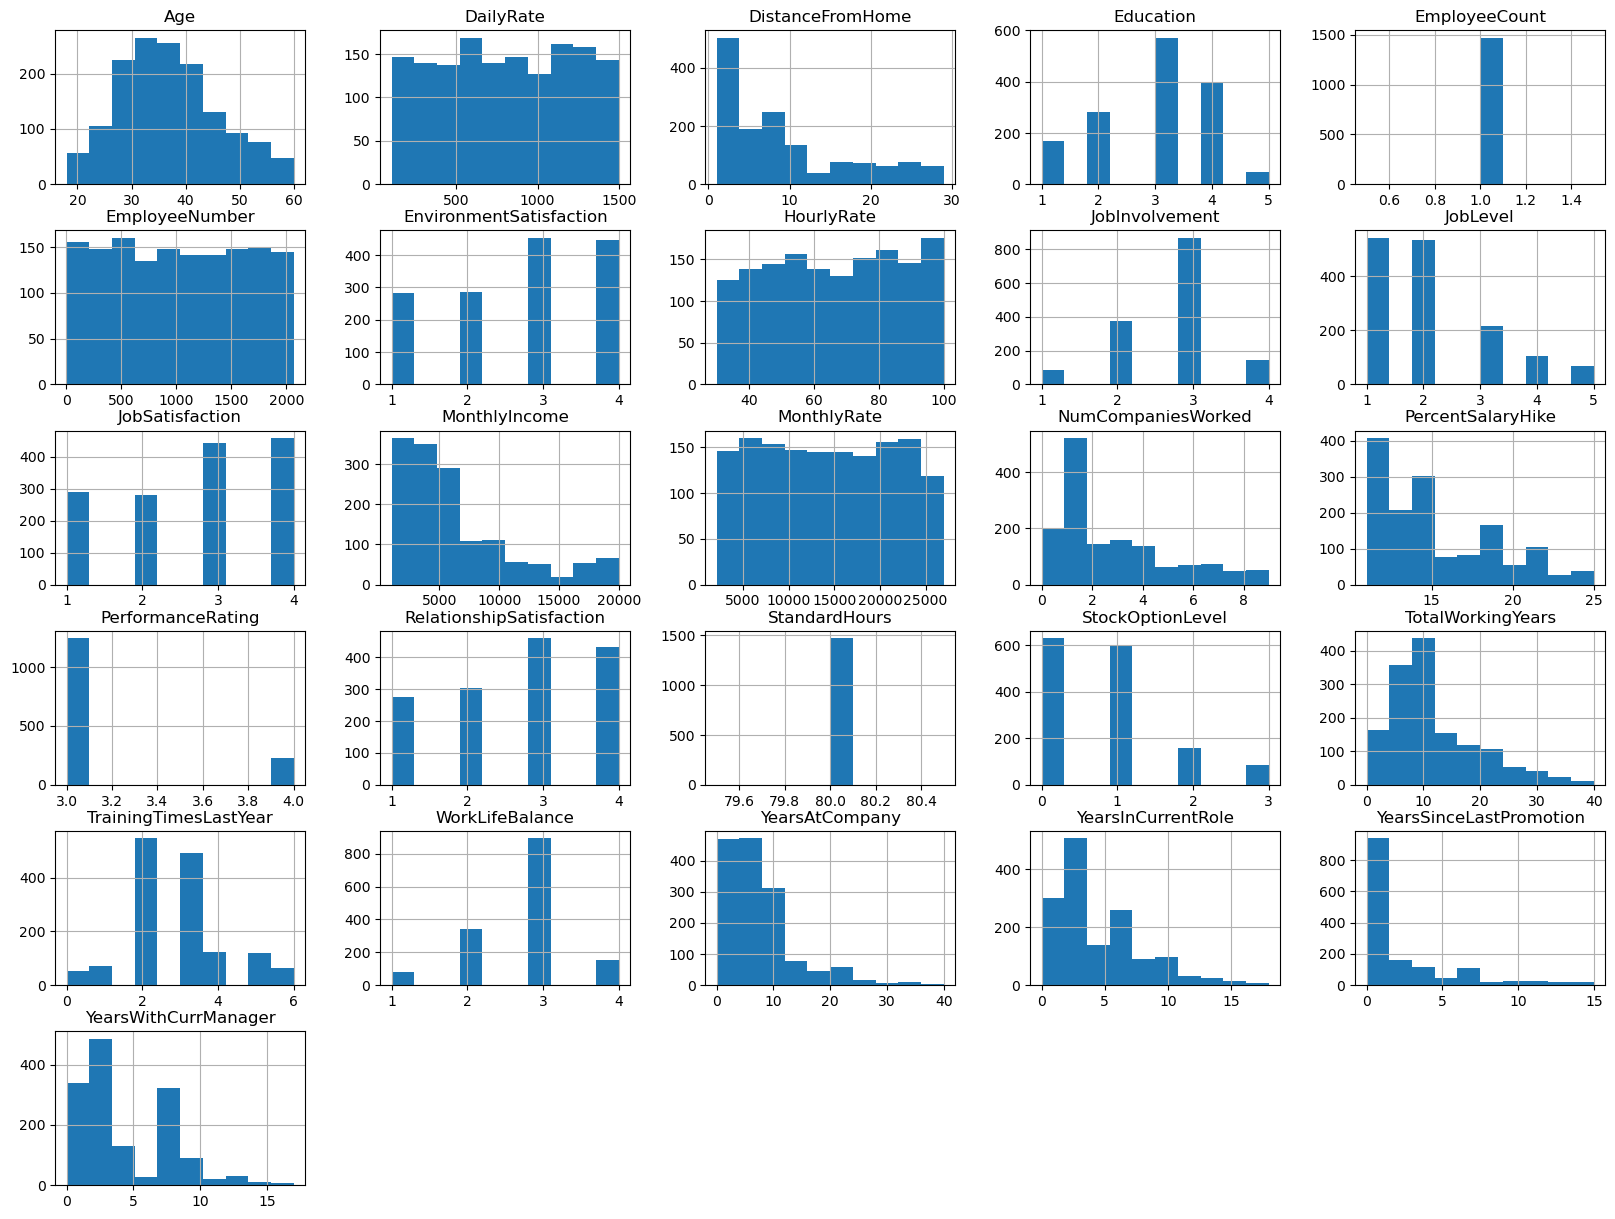

In [12]:
# plotting of histoplot
df.hist(figsize=(20, 15), bins=10);

<b><u> Bar plot count for object columns </b></u>

<Axes: xlabel='Attrition'>

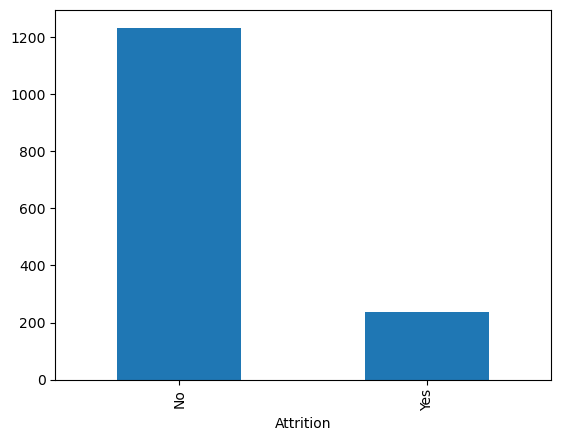

In [15]:
# Attrition Rates
df['Attrition'].value_counts().sort_index().plot.bar()

<Axes: xlabel='Gender'>

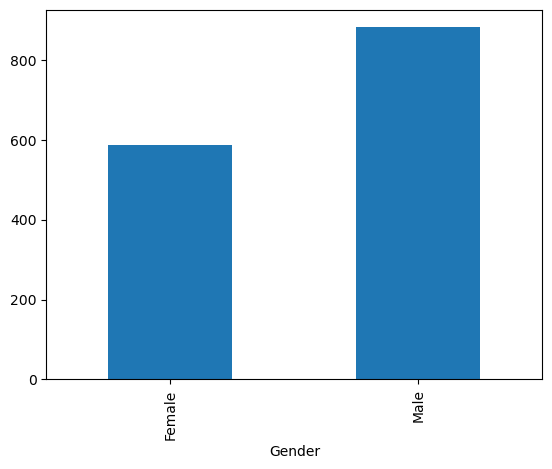

In [17]:
# Gender Count
df['Gender'].value_counts().sort_index().plot.bar()

<Axes: xlabel='OverTime'>

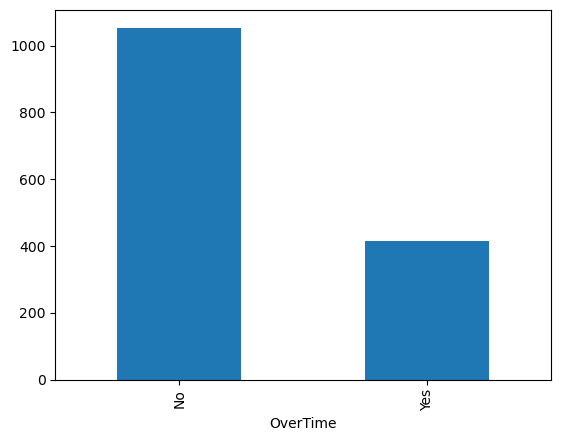

In [19]:
# Whether the employee faced overtime
df['OverTime'].value_counts().sort_index().plot.bar()

<Axes: xlabel='MaritalStatus'>

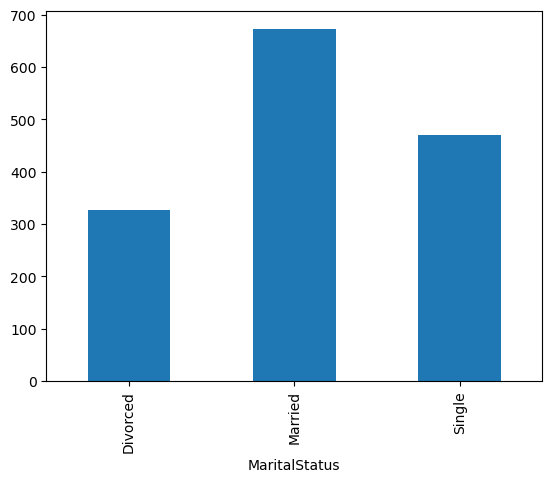

In [21]:
# Marital Status
df['MaritalStatus'].value_counts().sort_index().plot.bar()

<Axes: xlabel='BusinessTravel'>

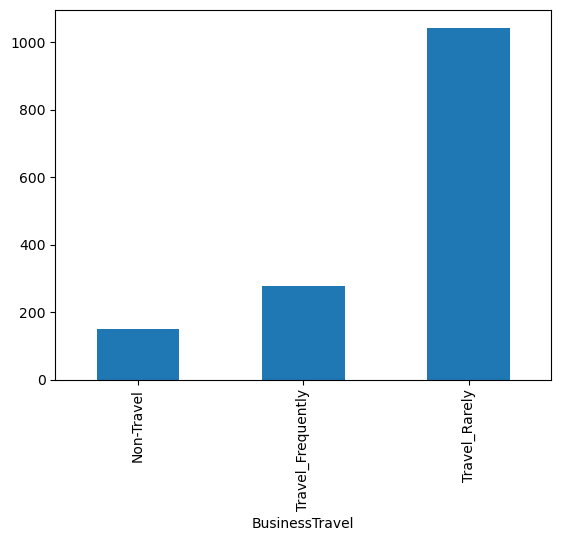

In [23]:
# Business Travel
df['BusinessTravel'].value_counts().sort_index().plot.bar()

<Axes: xlabel='Department'>

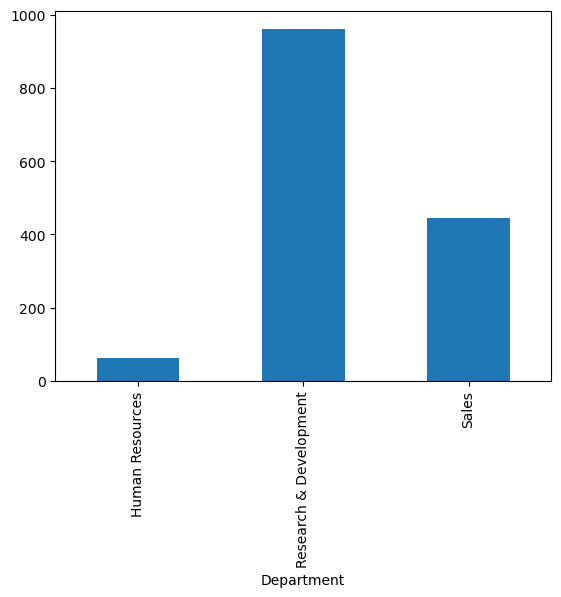

In [25]:
df['Department'].value_counts().sort_index().plot.bar()

<b><u> Comparison of certain features attrition </b></u>

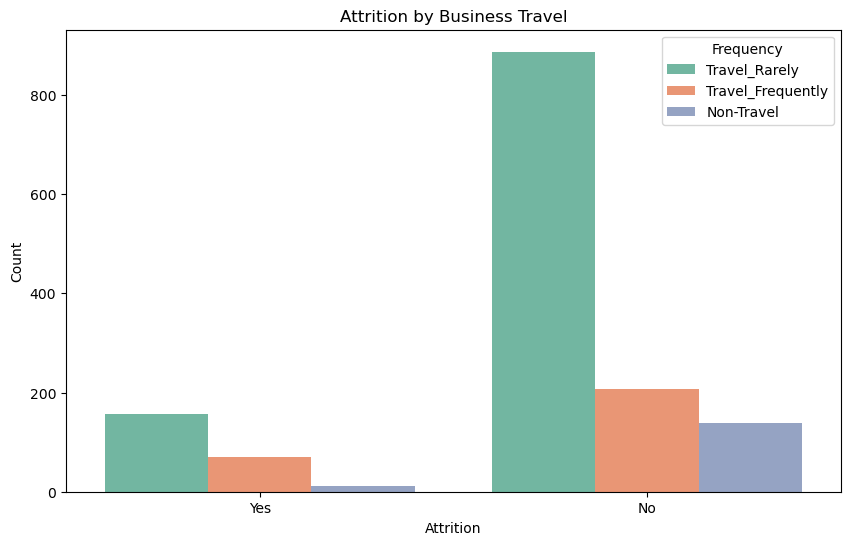

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition', hue='BusinessTravel',palette='Set2')
plt.title('Attrition by Business Travel')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.legend(title='Frequency')
plt.show()

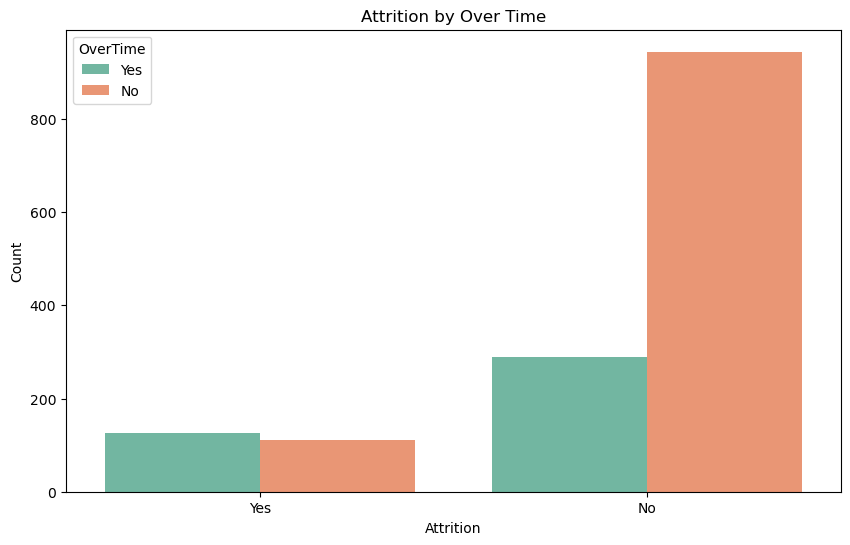

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition', hue='OverTime',palette='Set2')
plt.title('Attrition by Over Time')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

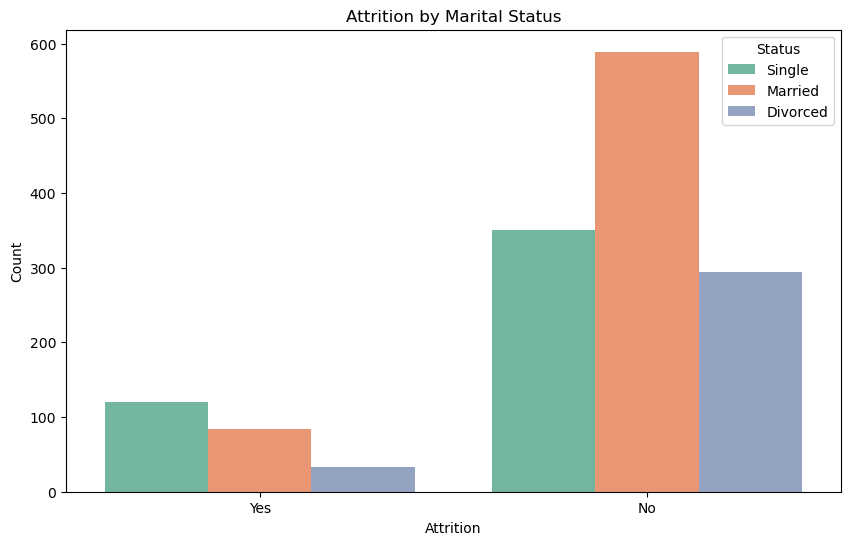

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition', hue='MaritalStatus',palette='Set2')
plt.title('Attrition by Marital Status')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

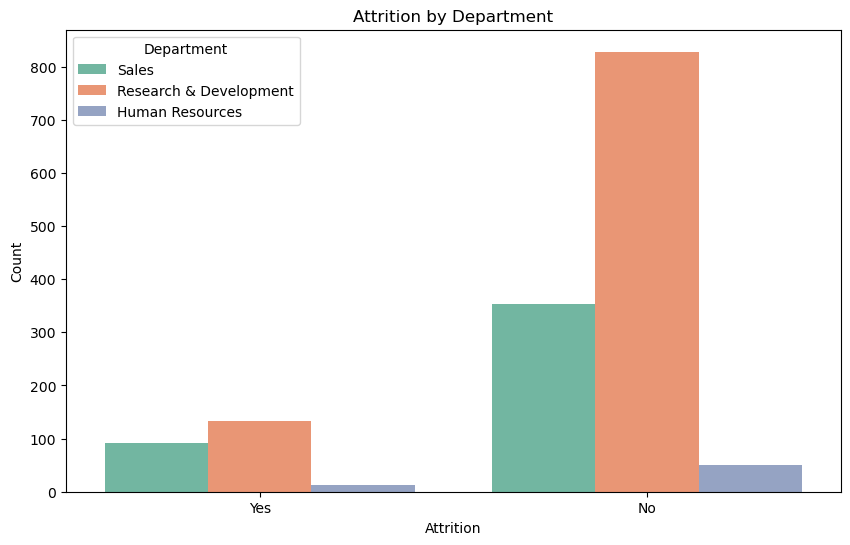

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition', hue='Department',palette='Set2')
plt.title('Attrition by Department')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.legend(title='Department')
plt.show()

Comparing attrition by gender will not give a good comparison as the value count for males are higher than females in the company

Gender
Male      882
Female    588
Name: count, dtype: int64

 ---------------------------------------------------------------------------------------------------- 



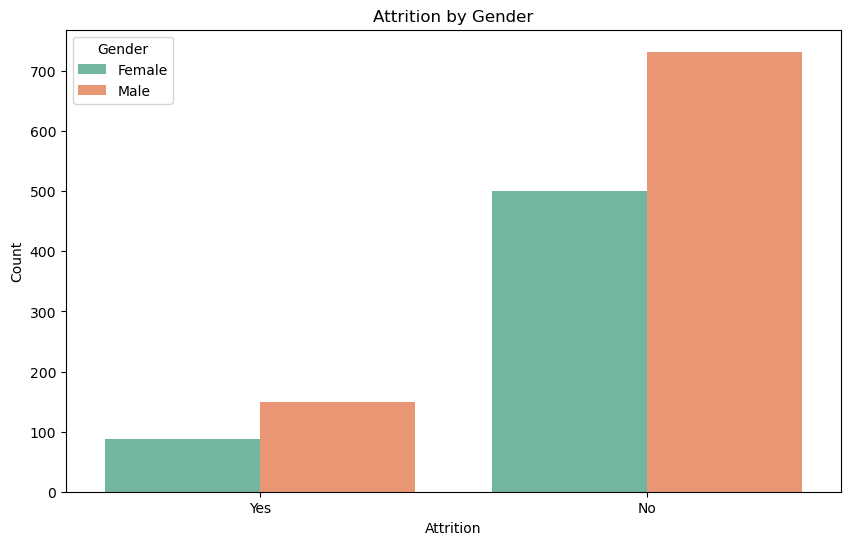

In [37]:
print(df["Gender"].value_counts())

print("\n", "--" * 50, "\n"),

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition', hue='Gender',palette='Set2')
plt.title('Attrition by Gender')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


<Axes: xlabel='Age', ylabel='Density'>

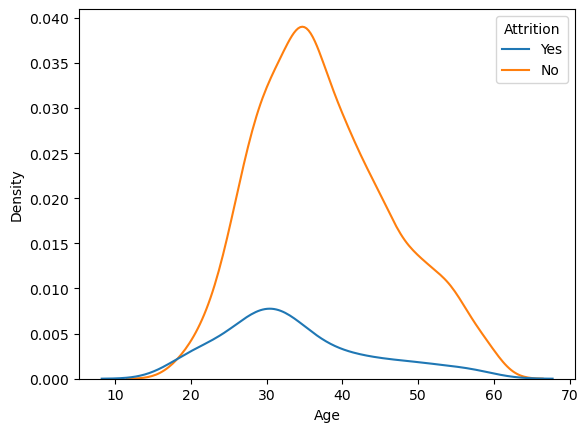

In [39]:
# comparing attrition with age
sns.kdeplot(data=df, x='Age', hue="Attrition")

<Axes: xlabel='YearsInCurrentRole', ylabel='Density'>

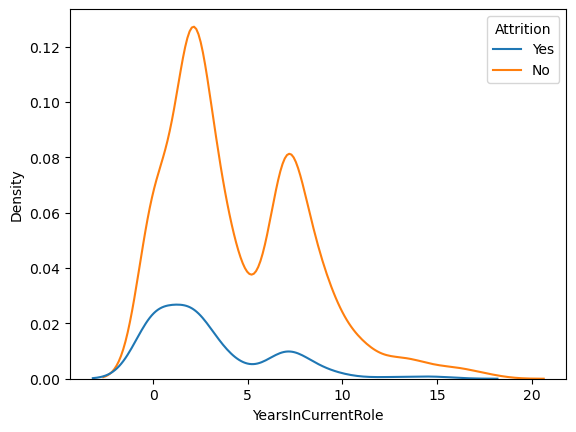

In [41]:
# comparing attrition with years in current role
sns.kdeplot(data=df, x='YearsInCurrentRole', hue="Attrition")

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

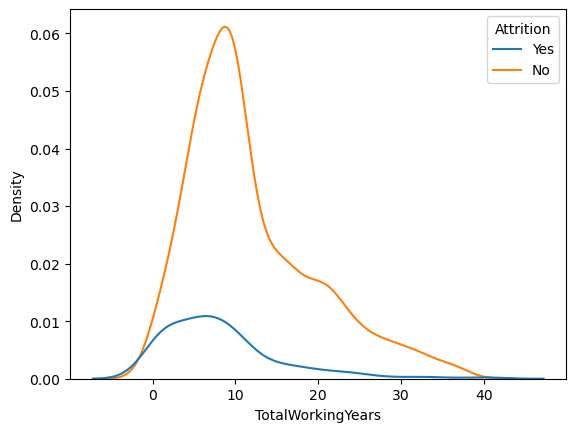

In [43]:
# comparing attrition with total working years
sns.kdeplot(data=df, x='TotalWorkingYears', hue="Attrition")

<b><u> Creating of correlation matrix </b></u>

There are some columns that are needed such as <code>Daily Rate</code>, <code>Hourly Rate</code>, <code>Monthly Rate </code>, <code>Employee Count</code>, <code>Over18</code>, <code>Employee Number</code> (considered as Employee ID = primary key) and <code>Standard Hours</code>. Thus, these columns will be remove from the dataset by using <code>.dropna()</code> function.

Label Encoder is also used to encode the columns with a string datatype. After, we are able to perform a correlation matrix.

In [5]:
# dropping of columns
df.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate', 'EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'], inplace=True)

df.info() #confirmation of the drop columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [7]:
#Encoding the dataframe

LE = LabelEncoder()
col_to_encode = df.select_dtypes(object)
for col in col_to_encode:
    df[col] = LE.fit_transform(df[col])

df.head() #confirmation of the encoding

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,...,3,4,1,6,3,3,2,2,2,2


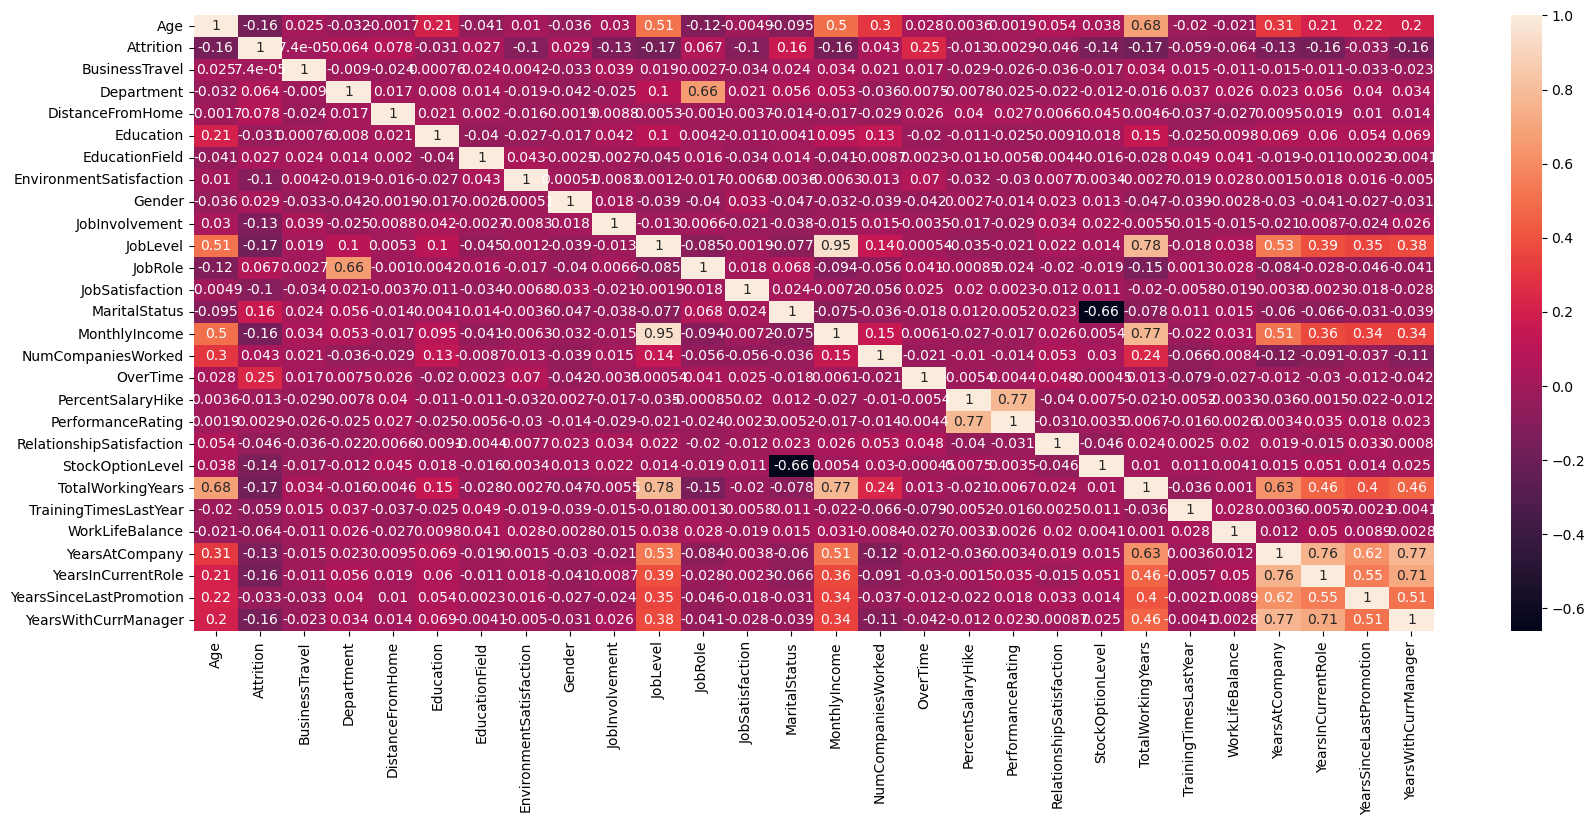

In [50]:
# plotting of correlation Matrix
df.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True);

Based from the correlation matrix, more columns can be removed as their values are -0.1<<code>column</code><0.1 when related to attrition. 

In [9]:
#dropping of columns that with weak or no relation to attrition
df.drop(columns=['Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobRole', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion'], inplace=True)

df.info() #confirmation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   BusinessTravel           1470 non-null   int64
 3   EnvironmentSatisfaction  1470 non-null   int64
 4   JobInvolvement           1470 non-null   int64
 5   JobLevel                 1470 non-null   int64
 6   JobSatisfaction          1470 non-null   int64
 7   MaritalStatus            1470 non-null   int64
 8   MonthlyIncome            1470 non-null   int64
 9   OverTime                 1470 non-null   int64
 10  StockOptionLevel         1470 non-null   int64
 11  TotalWorkingYears        1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
 13  YearsInCurrentRole       1470 non-null   int64
 14  YearsWithCurrManager     1470 non-null   int64
dtypes: i

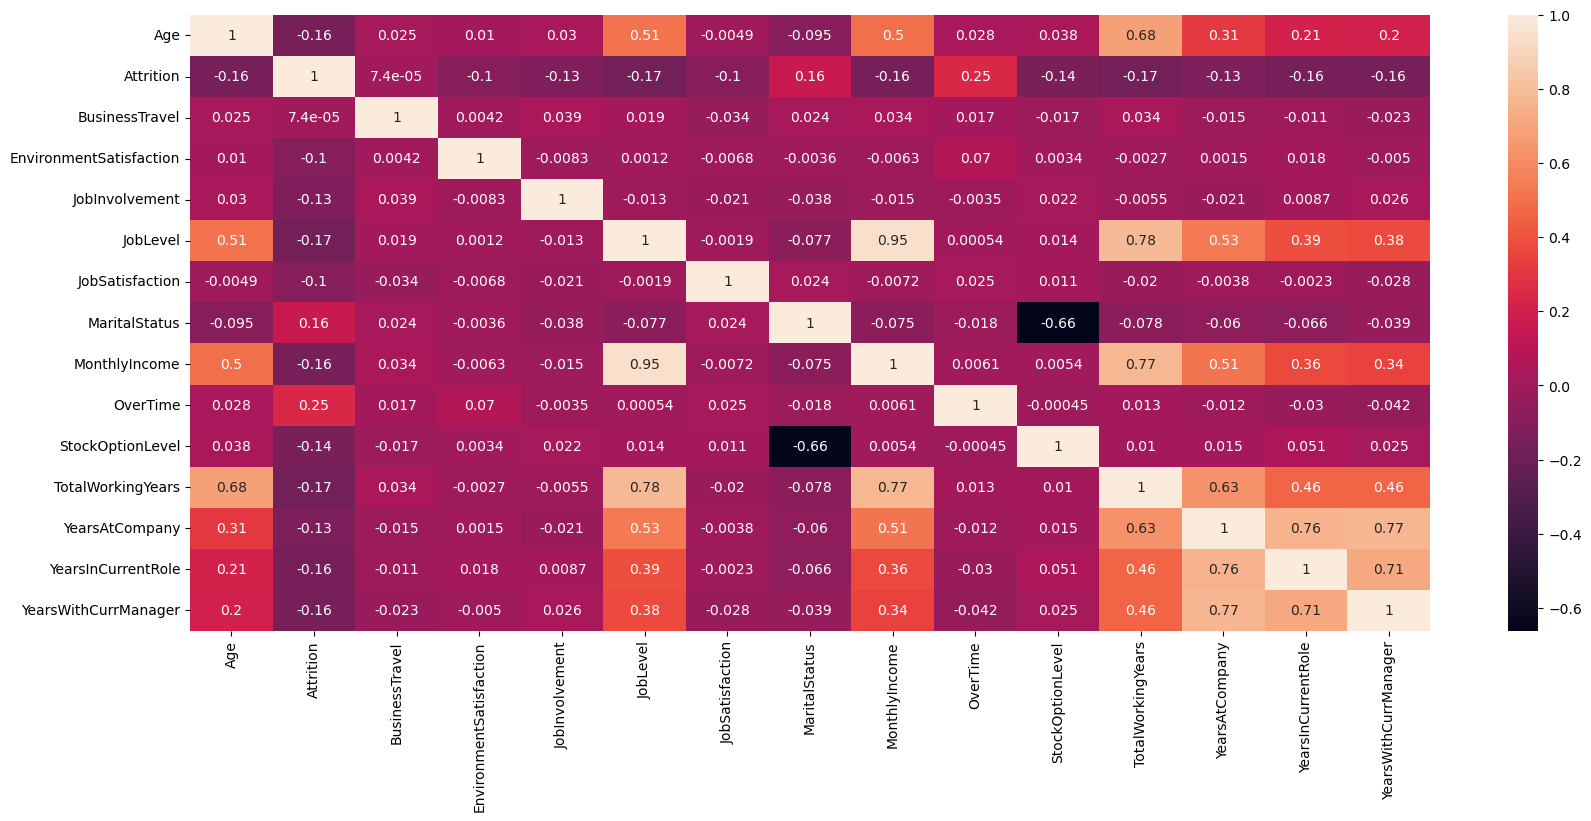

In [55]:
#updated correlation matrix
df.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True);

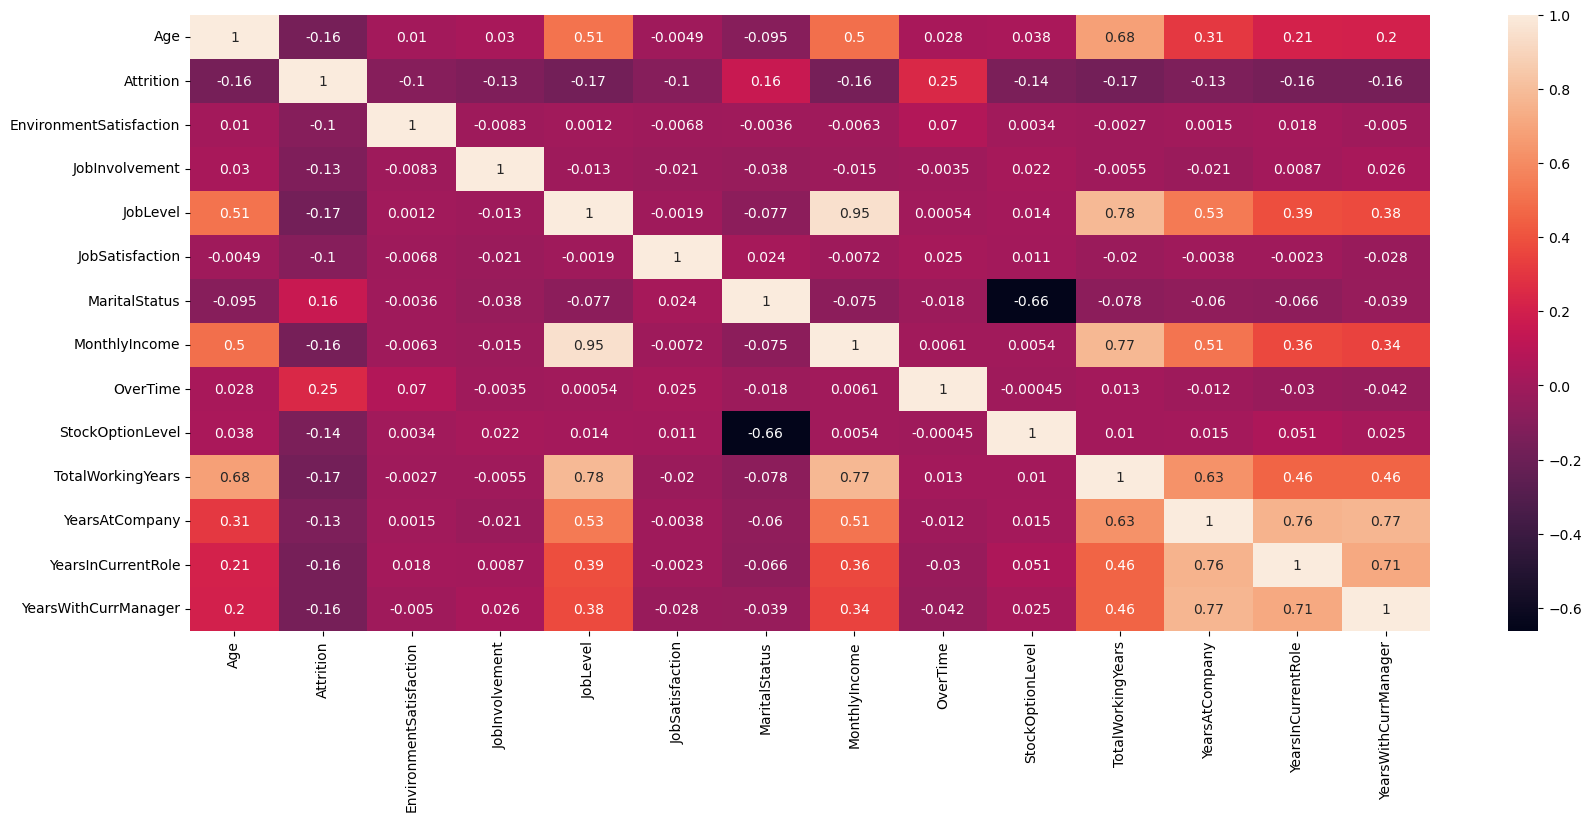

In [11]:
# businessTravel column got to be drop too
df.drop(columns='BusinessTravel', inplace=True)

df.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True);

### Feature Selection

The feature that significantly impacted employee attrition is <code>OverTime</code>

## Classification Models

### Selection of data

In [62]:
X = df.drop('Attrition', axis = 1)
Y = df['Attrition']

### Splitting of data

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0,stratify=Y)

<b> Handling Class Imbalance </b>

In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [70]:
#To display the data labels before and after oversampling the following is used:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 190
Before OverSampling, counts of label '0': 986 

After OverSampling, counts of label '1': 986
After OverSampling, counts of label '0': 986


### Model Building

<u>KNN Model</u>

In [74]:
# instantiating the model
knn=KNeighborsClassifier(n_neighbors=3) 

# fitting the model
knn.fit(X_train_res,Y_train_res)

KNeighborsClassifier(n_neighbors=3)

<u>Decision Tree Model</u>

In [77]:
# instantiating the model
tree=DecisionTreeClassifier()

# fitting the model
tree.fit(X_train_res,Y_train_res)

DecisionTreeClassifier()

<u>Random Forest Model</u>

In [80]:
#initialize the RF model using Entropy (Information Gain)
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#fit the Naive Bayes Model
RF.fit(X_train_res,Y_train_res)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Model Prediction

In [83]:
# KNN Prediction
KNNprediction=knn.predict(X_test)

# Decision tree prediction
treeprediction=tree.predict(X_test)

# RF Prediction
RFprediction=RF.predict(X_test)

### Model Evaluation

In [86]:
from sklearn.metrics import accuracy_score
KNNaccuracy = metrics.accuracy_score(Y_test, KNNprediction)
treeaccuracy = metrics.accuracy_score(Y_test, treeprediction)
RFaccuracy = metrics.accuracy_score(Y_test, RFprediction)

# printing of results
print('The KNN model accuracy score is:', KNNaccuracy*100, '%')
print('The Decision Tree model accuracy score is:', treeaccuracy*100, '%')
print('The Randam Forest Model accuracy score is:', RFaccuracy*100, '%')

The KNN model accuracy score is: 62.585034013605444 %
The Decision Tree model accuracy score is: 71.08843537414967 %
The Randam Forest Model accuracy score is: 81.63265306122449 %


<b> Evaluating KNN Model </b>

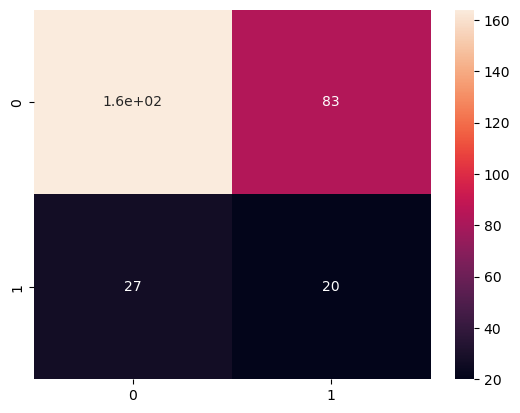

In [103]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, KNNprediction)  
cm

# visualising onto a heat map
sns.heatmap(cm, annot = True);

In [91]:
from sklearn.metrics import classification_report
print(metrics.classification_report(Y_test, KNNprediction))

# to change the prediction based on the model

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       247
           1       0.19      0.43      0.27        47

    accuracy                           0.63       294
   macro avg       0.53      0.54      0.51       294
weighted avg       0.75      0.63      0.67       294



<b> Evaluating Decision Tree Model </b>

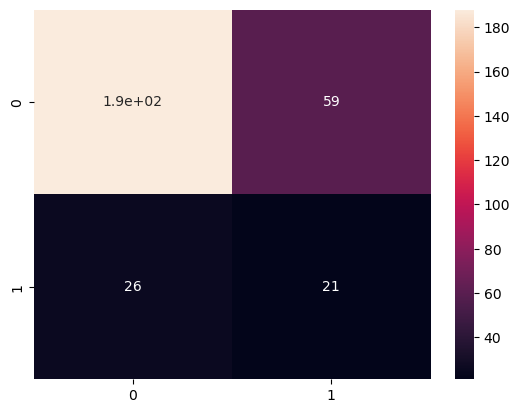

In [94]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, treeprediction)  
cm

# visualising onto a heat map
sns.heatmap(cm, annot = True);

In [96]:
from sklearn.metrics import classification_report
print(metrics.classification_report(Y_test, treeprediction))

# to change the prediction based on the model

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       247
           1       0.26      0.45      0.33        47

    accuracy                           0.71       294
   macro avg       0.57      0.60      0.57       294
weighted avg       0.78      0.71      0.74       294



<b> Evaluating Random Forest Model </b>

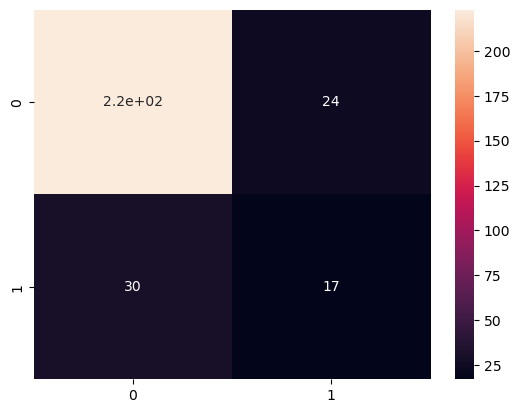

In [99]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, RFprediction)  
cm

# visualising onto a heat map
sns.heatmap(cm, annot = True);

In [101]:
from sklearn.metrics import classification_report
print(metrics.classification_report(Y_test, RFprediction))

# to change the prediction based on the model

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       247
           1       0.41      0.36      0.39        47

    accuracy                           0.82       294
   macro avg       0.65      0.63      0.64       294
weighted avg       0.81      0.82      0.81       294



## Clustering Model

In [13]:
df.head()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,3,2,4,2,5993,1,0,8,6,4,5
1,49,0,3,2,2,2,1,5130,0,1,10,10,7,7
2,37,1,4,2,1,3,2,2090,1,0,7,0,0,0
3,33,0,4,3,1,3,1,2909,1,0,8,8,7,0
4,27,0,1,3,1,2,1,3468,0,1,6,2,2,2


In [88]:
X = df.iloc[:, [1,8]].values

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Hierarchical Clustering

<u>Find number of clusters</u>

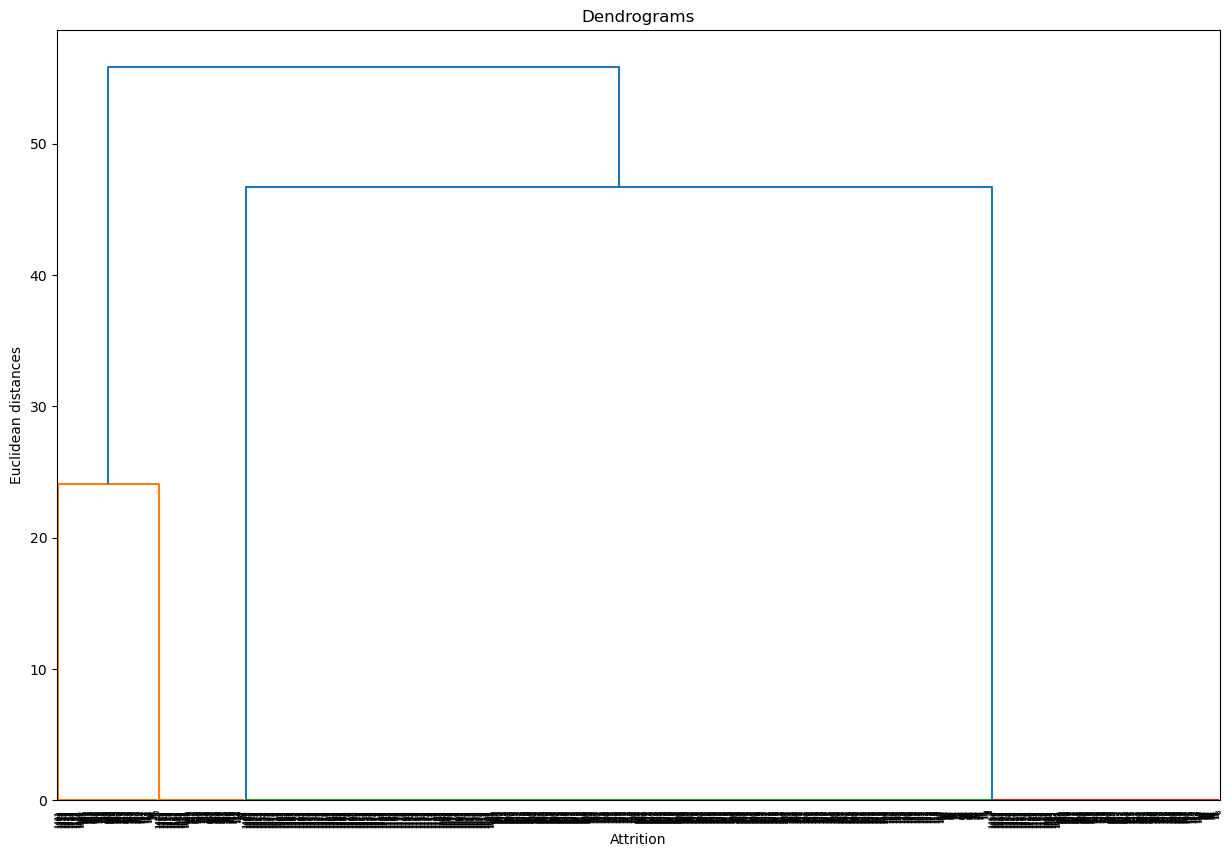

In [94]:
# import the library for denogram 
import scipy.cluster.hierarchy as sch

#dendrogram using ward method 
plt.figure(figsize=(15, 10)) 
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title("Dendrograms") 
plt.xlabel('Attrition')
plt.ylabel('Euclidean distances')
plt.show()

There are likely 2 clusters based on the dendograms

<u>Model Building</u>

In [96]:
# import the agglomerative/hierarchical cluster from scikit learn 
from sklearn.cluster import AgglomerativeClustering

# init the model
hc= AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

# fit and predict 
Y_hc = hc.fit_predict(X_scaled)
Y_hc


array([1, 0, 1, ..., 0, 0, 0])

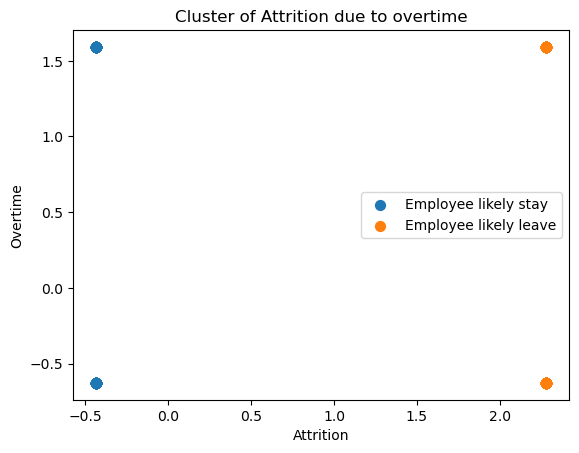

In [98]:
# Visualizing the  Cluster
plt.scatter(X_scaled[Y_hc == 0, 0], X_scaled[Y_hc == 0, 1], s=50, label = 'Employee likely stay')
plt.scatter(X_scaled[Y_hc == 1, 0], X_scaled[Y_hc == 1, 1], s=50, label = 'Employee likely leave')

plt.title('Cluster of Attrition due to overtime')
plt.xlabel('Attrition')
plt.ylabel('Overtime')
plt.legend()
plt.show()

## DBSCAN

In [56]:
# import the DBSCAN cluster and scaler from scikit learn 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X2 = df.iloc[:, [1,8]].values

# Scale the dataset
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Apply dbscan cluster
dbscan = DBSCAN(eps=0.5, min_samples = 5, metric='euclidean')

# fit the model for prediction
clusters = dbscan.fit_predict(X2_scaled)

# The labels_ property contains the list of clusters and their respective points
clusters = dbscan.labels_

In [58]:
from pandas import Series, DataFrame
df['cluster group'] = Series(clusters, index=df.index)
df

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,cluster group
0,41,1,2,3,2,4,2,5993,1,0,8,6,4,5,0
1,49,0,3,2,2,2,1,5130,0,1,10,10,7,7,1
2,37,1,4,2,1,3,2,2090,1,0,7,0,0,0,0
3,33,0,4,3,1,3,1,2909,1,0,8,8,7,0,2
4,27,0,1,3,1,2,1,3468,0,1,6,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,3,4,2,4,1,2571,0,1,17,5,2,3,1
1466,39,0,4,2,3,1,1,9991,0,1,9,7,7,7,1
1467,27,0,2,4,2,2,1,6142,1,1,6,6,2,3,2
1468,49,0,4,2,2,2,1,5390,0,0,17,9,6,8,1


In [60]:
# print number of instances in each cluster group
df['cluster group'].value_counts()

cluster group
1    944
2    289
0    127
3    110
Name: count, dtype: int64

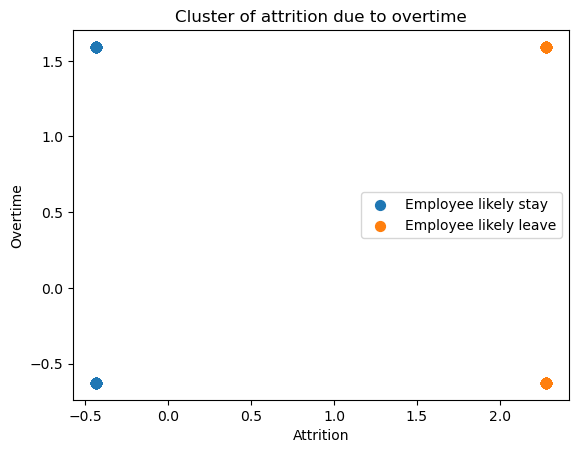

In [74]:
# Visualizing the  Cluster
plt.scatter(X2_scaled[Y_hc == 0, 0], X2_scaled[Y_hc == 0, 1], s=50, label = 'Employee likely stay')
plt.scatter(X2_scaled[Y_hc == 1, 0], X2_scaled[Y_hc == 1, 1], s=50, label = 'Employee likely leave')

plt.title('Cluster of attrition due to overtime')
plt.xlabel('Attrition')
plt.ylabel('Overtime')
plt.legend()
plt.show()

## Part 2 (Insurance Charges)

### Importing Data

In [5]:
df = pd.read_csv("Insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Understanding

In [7]:
print("Dimension of the data:", df.shape)

print("\n", "--" * 50, "\n")

print("Summary of the data\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum())

print("\n", "--" * 50, "\n")
print("Statistical description:\n")
display(df.describe())


Dimension of the data: (1338, 7)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


 ---------------------------------------------------------------------------------------------------- 

Statistical description:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='smoker'>

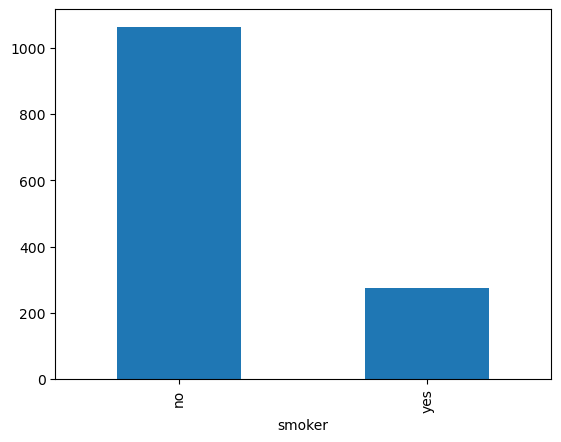

In [9]:
# Smoker countplot
df['smoker'].value_counts().sort_index().plot.bar()

<b>Correlation Matrix</b>

In [12]:
LE = LabelEncoder()
columns_to_encode = ['sex', 'smoker', 'region']
for col in columns_to_encode:
    df[col] = LE.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


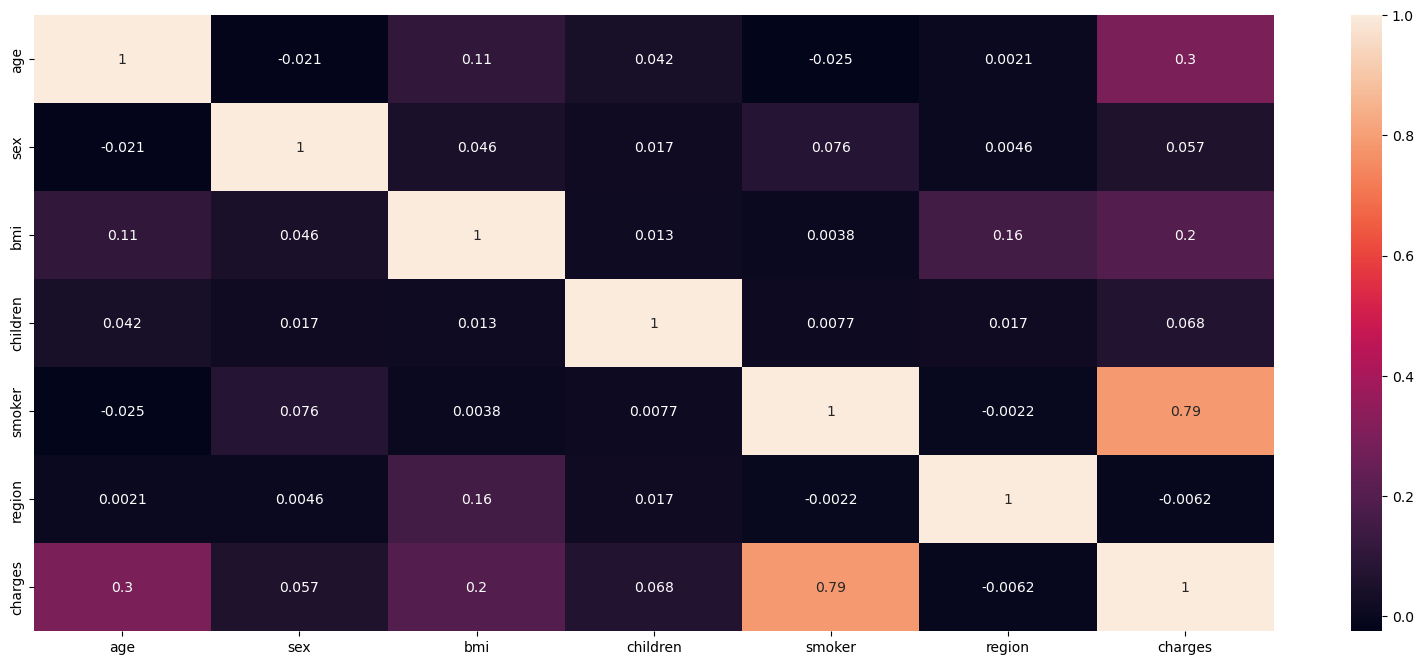

In [14]:
df.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True);

### Dropping of column

Dropping of column <code>sex</code>, <code>children</code>, <code>region</code> before selection of data. As the correlation of these columns are -0.1<<code>col</code><0.1, which meant that there are no or weak correlation.

In [18]:
df.drop(columns=['sex', 'children', 'region'], inplace=True)

df.info() #confirmation of the drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   bmi      1338 non-null   float64
 2   smoker   1338 non-null   int64  
 3   charges  1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


# Single Linear Regression

### Selection of Data

In [168]:
X = df[['smoker']]
Y = df['charges']

### Splitting the data

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

### Model Building

In [174]:
# instantiating the model
slr_model = LinearRegression()

# fit() is used to pass training data to train the model
slr_model.fit(X_train, Y_train)

LinearRegression()

### Model Prediction

In [177]:
# SLR Model Prediction
slr_Y_pred = slr_model.predict(X_test)

### Model Evaluation

In [180]:
print('SLR Mean Absolute Error:', metrics.mean_absolute_error(Y_test, slr_Y_pred))
print('SLR Mean Squared Error:', metrics.mean_squared_error(Y_test, slr_Y_pred))
print('SLR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, slr_Y_pred)))

SLR Mean Absolute Error: 5510.907974256734
SLR Mean Squared Error: 51967187.52792954
SLR Root Mean Squared Error: 7208.827056319879


In [188]:
from sklearn.metrics import r2_score
print("SLR R2 score:", r2_score(Y_test, slr_Y_pred)*100, "%")

SLR R2 score: 67.34292727177755 %


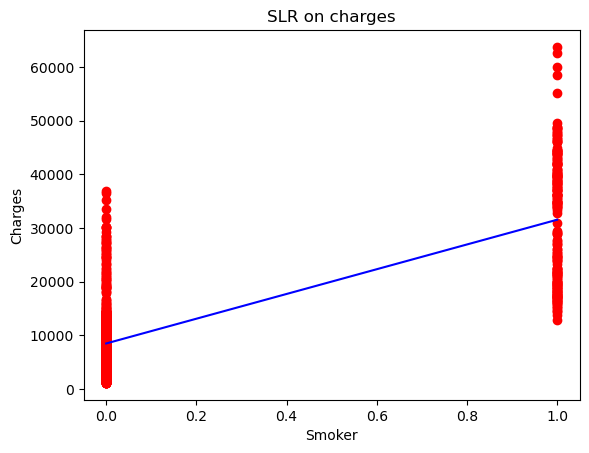

In [184]:
# Visualizing the Result (Training_Set)
plt.scatter(X_train,Y_train, color= 'red')
plt.plot(X_train, slr_model.predict(X_train), color= 'blue' )
plt.title('SLR on charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Mulitple Linear Regression

### Selection of Data

In [100]:
X2 = df.drop('charges', axis = 1)
Y2 = df['charges']

### Splitting the data

In [103]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2,random_state=0)

### Model Building

In [106]:
# instantiating the model
mlr_model = LinearRegression()

# fit() is used to pass training data to train the model
mlr_model.fit(X2_train, Y2_train)

LinearRegression()

### Model Predicition

In [109]:
# MLR Model Prediciton
mlr_Y_pred = mlr_model.predict (X2_test)

### Model Evaluation

In [112]:
print('MLR Mean Absolute Error:', metrics.mean_absolute_error(Y2_test, mlr_Y_pred))
print('MLR Mean Squared Error:', metrics.mean_squared_error(Y2_test, mlr_Y_pred))
print('MLR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y2_test, mlr_Y_pred)))

MLR Mean Absolute Error: 3960.8666198087158
MLR Mean Squared Error: 32693237.938726168
MLR Root Mean Squared Error: 5717.80009607945


In [190]:
print("MLR R2 score:", r2_score(Y2_test, mlr_Y_pred)*100,"%")

MLR R2 score: 79.45500805653087 %


## Part 3 (Tv Shows)

### Import Dataset

In [200]:
df = pd.read_csv('TV Shows.csv') 

#confirming data
df.head()

,Cobra Kai,Lupin,12 Monkeys,Sherlock,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ozark,Sex Education,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sex Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As the dataframe has no header, it is reimported without a header

In [203]:
df = pd.read_csv('TV Shows.csv', header = None) 

#confirming data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Cobra Kai,Lupin,12 Monkeys,Sherlock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ozark,Sex Education,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

<u>Data Description</u>

In [207]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9690,7557,5947,4667,3678,2837,2197,1664,1231,887,...,14,8,7,7,6,5,4,1,1,1
unique,156,145,147,145,142,130,132,133,122,115,...,13,7,6,7,5,4,3,1,1,1
top,Daredevil,Sex Education,Sex Education,Sex Education,Two and a half men,Outer Banks,Outer Banks,Lucifer,Outer Banks,Lucifer,...,Spartacus,Dark,Shadow and Bone,The Queen's Gambit,Big Little Lies,Chernobyl,Startup,You,Big Little Lies,Dark
freq,811,646,499,310,174,149,120,74,60,48,...,2,2,2,1,2,2,2,1,1,1


<u>Data Shape</u>

In [210]:
df.shape

(9690, 32)

<u>Transforming the Data</u>

In [213]:
records = []
for i in range(0, 9690):
    records.append([str(df.values[i,j]) for j in range(0, 32)])

In [215]:
records

[['Cobra Kai',
  'Lupin',
  '12 Monkeys',
  'Sherlock',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['Lost',
  'Jack Ryan',
  'The Flash',
  'Game of thrones',
  'House of Cards',
  '12 Monkeys',
  'Vikings',
  'Fringe',
  'The Mentalist',
  'The Alienist',
  'Big Little Lies',
  'Chernobyl',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['Sex Education',
  'Dr. House',
  'Kingdom',
  'The Walking Dead',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  '

### Model Building

<u> Installing and Applying Apriori Algorithm</u>

In [219]:
!pip install apyori

In [221]:
from apyori import apriori # association rule

# association rule apriori
association_rules = apriori(records, min_support=0.0003, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
association_results = list(association_rules)

In [223]:
# print the total number of rules mined by the apriori class
print(len(association_results))

103


In [225]:
# print the first item in the association rules
print(association_results[0])

RelationRecord(items=frozenset({'12 Monkeys', 'Death Note'}), support=0.0005159958720330237, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Death Note'}), items_add=frozenset({'12 Monkeys'}), confidence=0.3125, lift=5.331205985915493)])


In [227]:
# print and display the rule, the support, the confidence, and lift for each rule
results = []
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    value0= str(items[0])
    value1= str(items[1])


    #second index of the inner list
    value2=str(item[1])[:7]

    #third index of the list located at 0th
    #of the third index of the inner list
    value3 =str(item[2][0][2])[:7]
    value4 =str(item[2][0][3])[:7]

    rows=(value0, value1, value2, value3, value4)
    results.append(rows)

    labels =['Title 1', 'Title 2', 'Support', 'Confidence', 'Lift']
    df= pd.DataFrame.from_records(results, columns = labels)
    print(df)
    print("=====================================")

      Title 1     Title 2  Support Confidence     Lift
0  12 Monkeys  Death Note  0.00051     0.3125  5.33120
           Title 1     Title 2  Support Confidence     Lift
0       12 Monkeys  Death Note  0.00051     0.3125  5.33120
1  Game of thrones  12 Monkeys  0.00381    0.22023  3.75723
           Title 1     Title 2  Support Confidence     Lift
0       12 Monkeys  Death Note  0.00051     0.3125  5.33120
1  Game of thrones  12 Monkeys  0.00381    0.22023  3.75723
2       Inside Job  12 Monkeys  0.00123    0.24489  4.17792
           Title 1     Title 2  Support Confidence     Lift
0       12 Monkeys  Death Note  0.00051     0.3125  5.33120
1  Game of thrones  12 Monkeys  0.00381    0.22023  3.75723
2       Inside Job  12 Monkeys  0.00123    0.24489  4.17792
3      Space Force  12 Monkeys  0.00061    0.27272  4.65268
           Title 1     Title 2  Support Confidence     Lift
0       12 Monkeys  Death Note  0.00051     0.3125  5.33120
1  Game of thrones  12 Monkeys  0.00381    0.22023

<u> Displaying results by descending lifts</u>

In [252]:
print(df.sort_values(by=['Lift'],axis=0, ascending=False))

                        Title 1          Title 2  Support Confidence     Lift
23                   South Park   Berlin Station  0.00051        0.5  9.00557
96              Shadow and Bone        Teen Wolf  0.00030    0.42857  8.59804
61              Game of thrones          Vikings  0.00485    0.27976  8.29019
72  How to get away with murder            Suits  0.00227    0.30985  8.13695
20                   South Park          Banshee  0.00030    0.30000  7.85675
..                          ...              ...      ...        ...      ...
30                 Breaking Bad    The Originals  0.00030       0.25  14.9537
27                   South Park  Big Little Lies  0.00041        0.4  12.2658
60                         Lost           Fringe  0.00309    0.37974  11.3924
89                     Watchmen       Perception  0.00030        0.2  10.3636
63                        Grimm       Perception  0.00030        0.2  10.3636

[103 rows x 5 columns]
